/tmp/ipython-input-2-2599950107.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start='2022-01-01', end='2024-01-01')  # Historical stock data for 2 years
[*********************100%***********************]  1 of 1 completed


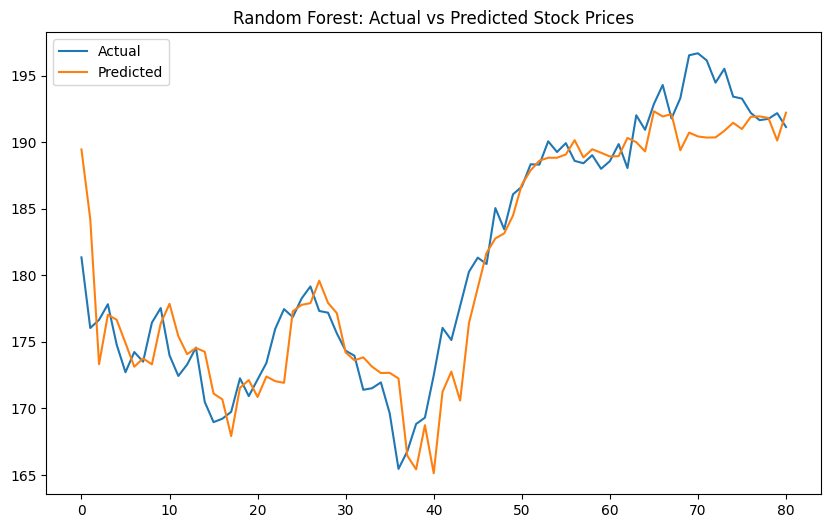

MAE: 2.166849239019701
MSE: 8.808848711745581


In [ ]:
# Advanced Task 2: Stock Price Prediction with Feature Engineering and Random Forest

# Import necessary libraries
import yfinance as yf  # to fetch stock data from Yahoo Finance
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for plotting
from sklearn.ensemble import RandomForestRegressor  # model for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error  # evaluation metrics
from sklearn.model_selection import TimeSeriesSplit  # time-series-aware splitting

# Download Apple stock data from Yahoo Finance
stock = yf.download('AAPL', start='2022-01-01', end='2024-01-01')  # Historical stock data for 2 years

# Feature engineering: create useful predictors
stock['Next_Close'] = stock['Close'].shift(-1)  # Target variable: next day's close
stock['Close_Lag1'] = stock['Close'].shift(1)  # Lagged close price (previous day)
stock['MA5'] = stock['Close'].rolling(window=5).mean()  # 5-day moving average
stock['MA10'] = stock['Close'].rolling(window=10).mean()  # 10-day moving average

# Drop any rows with NaN due to shifting and rolling
stock = stock.dropna()

# Select input features and target
features = ['Open', 'High', 'Low', 'Volume', 'Close_Lag1', 'MA5', 'MA10']  # Feature columns
X = stock[features]  # Features
y = stock['Next_Close']  # Target: next close price

# Use time-series cross-validation for splitting
tscv = TimeSeriesSplit(n_splits=5)  # Define 5 splits
for train_index, test_index in tscv.split(X):  # Iterate through each split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Get training features
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Get training targets

# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random forest with 100 trees
model.fit(X_train, y_train)  # Fit model to training data

# Make predictions on test set
y_pred = model.predict(X_test)  # Predict the stock price

# Plot actual vs predicted close prices
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(y_test.values, label='Actual')  # Plot actual values
plt.plot(y_pred, label='Predicted')  # Plot predicted values
plt.title('Random Forest: Actual vs Predicted Stock Prices')  # Title
plt.legend()  # Show legend
plt.show()  # Display the plot

# Evaluate the model's performance
print("MAE:", mean_absolute_error(y_test, y_pred))  # Mean Absolute Error
print("MSE:", mean_squared_error(y_test, y_pred))  # Mean Squared Error